In [252]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.datasets import make_blobs



In [253]:
df = pd.read_csv("Clustering_gmm (2).csv")
df

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  500 non-null    float64
 1   Height  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [255]:
df.describe()

,Weight,Height
count,500.000000,500.000000
mean,61.270240,169.515781
std,5.196976,4.805095
min,50.433644,160.182164
25%,57.772791,166.607599
50%,61.961518,169.726252
75%,65.439332,172.837284
max,70.700456,178.894770


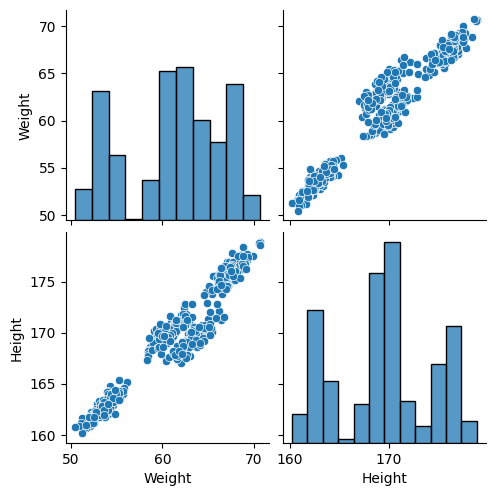

In [256]:
sns.pairplot(df)

In [257]:
n_clusters = range(1,11)
bic_scores = []

In [258]:
for n in n_clusters:
    gmm = GaussianMixture(n_components=n , random_state=0)
    gmm.fit(df)
    bic_scores.append(gmm.bic(df))

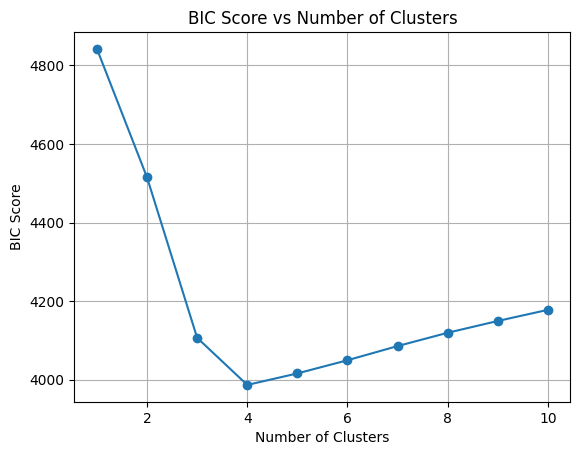

In [259]:
plt.plot(n_clusters, bic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score vs Number of Clusters')
plt.grid()
plt.show()

In [260]:
optimal_n_clusters = np.argmin(bic_scores) + 1
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=0)
gmm.fit(df)

GaussianMixture(n_components=np.int64(4), random_state=0)

In [261]:
print("Optimal number of clusters = " , optimal_n_clusters)

Optimal number of clusters =  4


In [262]:
prediction = gmm.predict(df)

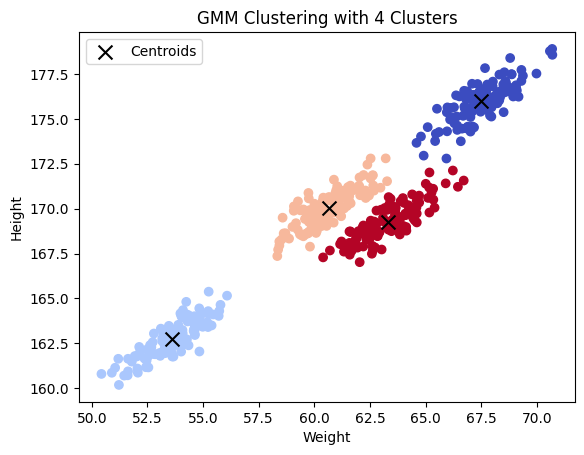

In [263]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=prediction, cmap='coolwarm')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', s=100, color='black', label='Centroids')
plt.legend()
plt.title(f'GMM Clustering with {optimal_n_clusters} Clusters')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [264]:

df['GMM_Clusters'] = prediction
df

,Weight,Height,GMM_Clusters
0,67.062924,176.086355,0
1,68.804094,178.388669,0
2,60.930863,170.284496,2
3,59.733843,168.691992,2
4,65.431230,173.763679,0
...,...,...,...
495,59.976983,169.679741,2
496,66.423814,174.625574,0
497,53.604698,161.919208,1
498,50.433644,160.794875,1


In [265]:
cluster1 = df[df['GMM_Clusters'] == 0]
print("Min Height : ",cluster1['Height'].min())
print("Max Height : ",cluster1['Height'].max())
print("Min Weight : ",cluster1['Weight'].min())
print("Max Weight : ",cluster1['Weight'].max())
cluster1['Height'].max()
cluster1.describe()

Min Height :  172.79128267836566
Max Height :  178.89477040592664
Min Weight :  64.59402463408792
Max Weight :  70.7004560092701


,Weight,Height,GMM_Clusters
count,126.000000,126.000000,126.0
mean,67.504545,175.960774,0.0
std,1.146490,1.091405,0.0
min,64.594025,172.791283,0.0
25%,66.868252,175.408104,0.0
50%,67.474253,176.058400,0.0
75%,68.230678,176.553564,0.0
max,70.700456,178.894770,0.0


In [266]:
cluster2 = df[df['GMM_Clusters'] == 1]
print("Min Height : ",cluster2['Height'].min())
print("Max Height : ",cluster2['Height'].max())
print("Min Weight : ",cluster2['Weight'].min())
print("Max Weight : ",cluster2['Weight'].max())
cluster2.describe()

Min Height :  160.18216445040093
Max Height :  165.37564557149568
Min Weight :  50.43364367163626
Max Weight :  56.07878064846279


,Weight,Height,GMM_Clusters
count,125.000000,125.000000,125.0
mean,53.600298,162.764782,1.0
std,1.122123,1.018100,0.0
min,50.433644,160.182164,1.0
25%,53.073473,162.043844,1.0
50%,53.641564,162.769970,1.0
75%,54.301359,163.405498,1.0
max,56.078781,165.375646,1.0


In [267]:
cluster3 = df[df['GMM_Clusters'] == 2]
print("Min Height : ",cluster3['Height'].min())
print("Max Height : ",cluster3['Height'].max())
print("Min Weight : ",cluster3['Weight'].min())
print("Max Weight : ",cluster3['Weight'].max())
cluster3.describe()

Min Height :  167.3589452790697
Max Height :  172.79920990129892
Min Weight :  58.337461294988245
Max Weight :  63.27181362596458


,Weight,Height,GMM_Clusters
count,125.000000,125.000000,125.0
mean,60.654206,170.030992,2.0
std,1.144241,1.043238,0.0
min,58.337461,167.358945,2.0
25%,59.856871,169.397309,2.0
50%,60.609202,169.985230,2.0
75%,61.338244,170.696806,2.0
max,63.271814,172.799210,2.0


In [268]:
cluster4 = df[df['GMM_Clusters'] == 3]
print("Min Height : ",cluster4['Height'].min())
print("Max Height : ",cluster4['Height'].max())
print("Min Weight : ",cluster4['Weight'].min())
print("Max Weight : ",cluster4['Weight'].max())
cluster4.describe()

Min Height :  167.01825064051462
Max Height :  172.1232368463042
Min Weight :  60.39660738671346
Max Weight :  66.71668643853911


,Weight,Height,GMM_Clusters
count,124.000000,124.000000,124.0
mean,63.288179,169.252911,3.0
std,1.247482,1.053350,0.0
min,60.396607,167.018251,3.0
25%,62.445565,168.634625,3.0
50%,63.308714,169.160961,3.0
75%,64.126752,169.950042,3.0
max,66.716686,172.123237,3.0
